# What drives the price of a car?

![](../images/kurt.jpeg)


**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

<b>Reframing the Task</b>

From a business perspective, we are tasked with identifying the key drivers for used car prices. In the CRISP-DM overview, we are asked to convert this business framing into a data problem definition.

<b>Data Problem Definition</b>

The objective is to conduct a multivariate analysis to identify and quantify the impact of various features on used car prices. This requires collecting a comprehensive dataset containing variables such as car age, mileage, make, model, condition, and other relevant attributes. After preprocessing the data to handle missing values and outliers, feature selection techniques will be applied to isolate significant predictors. A regression model will then be developed and validated to accurately estimate used car prices based on these key features. The final model will be used to provide insights to used car dealers on the factors that drive car prices and help them make informed decisions on pricing and inventory management.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression, RidgeCV
from category_encoders.target_encoder import TargetEncoder

In [19]:
# Load the dataset
df = pd.read_csv('data/vehicles.csv')

df.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
203014,7316341861,holland,2800,1994.0,ford,ranger 4x4,good,6 cylinders,gas,190000.0,clean,automatic,NaN,4wd,NaN,truck,green,mi
275510,7316379193,new york city,1950,2000.0,toyota,camry,good,4 cylinders,gas,180000.0,clean,automatic,NaN,fwd,mid-size,sedan,brown,ny
189544,7304969782,south coast,10000,2001.0,ford,f650,good,6 cylinders,diesel,164000.0,clean,manual,NaN,rwd,NaN,NaN,white,ma
314543,7307969547,corvallis/albany,6950,2006.0,honda,civic lx,NaN,NaN,gas,138000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,or
306295,7310647465,oklahoma city,3999,2005.0,toyota,camry,excellent,4 cylinders,gas,160000.0,clean,automatic,4T1BE32K95U016770,fwd,full-size,sedan,white,ok
286880,7313396420,akron / canton,12572,2013.0,ford,edge,NaN,NaN,gas,120552.0,clean,automatic,2FMDK3JC1DBC48747,NaN,NaN,other,black,oh
233353,7311808030,charlotte,4000,1990.0,toyota,pickup,excellent,4 cylinders,gas,146000.0,clean,manual,NaN,rwd,compact,truck,grey,nc
56560,7315127694,san diego,18999,2018.0,nissan,rogue sport,NaN,NaN,other,10187.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,ca
79797,7308196919,fort collins / north CO,0,2018.0,subaru,forester,NaN,NaN,gas,30377.0,clean,automatic,JF2SJAAC3JH616509,NaN,NaN,SUV,red,co
209058,7309351400,saginaw-midland-baycity,34590,2020.0,lexus,nx 300 sport utility 4d,good,NaN,gas,7678.0,clean,other,JTJAARBZ4L2166674,fwd,NaN,hatchback,black,mi


**Observations**

The data is not clean, there are missing and duplicate values. There are also outliers that do not make sense. For example, the minimum price of a car is 0 and the maximum price is unrealistic. The data also contains a mix of numeric and categorical features, which will require different preprocessing steps. The dataset contains a mix of features that may or may not be relevant to predicting car prices, such as VIN, drive, size, and type. The data will need to be cleaned and preprocessed before it can be used to build a regression model to predict car prices. 

Text(0.5, 0, 'Price Distribution')

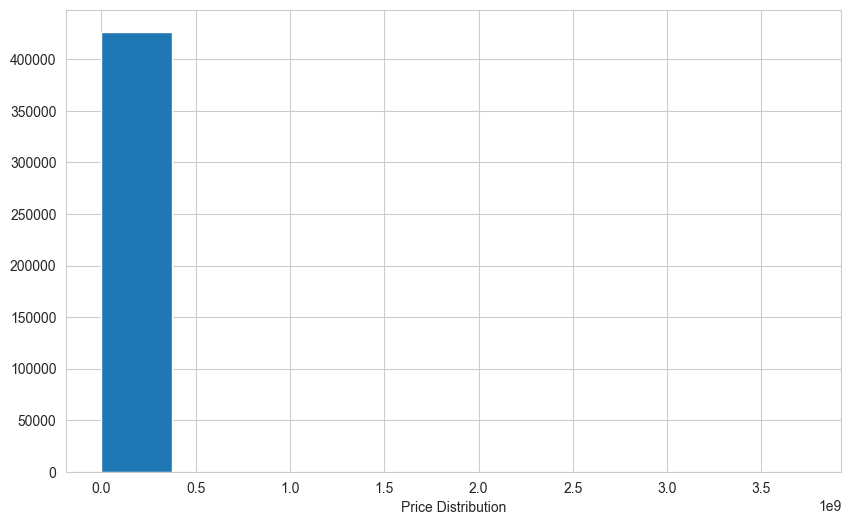

In [20]:
# Histogram of price distribution
plt.figure(figsize=(10, 6))
plt.hist(df['price'])
plt.xlabel("Price Distribution")

<b>Observations:</b> The histogram of price distribution reveals a right-skewed distribution with a long tail of high-priced outliers. The majority of vehicles are priced below $50,000, with a sharp decline in frequency as prices increase. The presence of high-priced outliers suggests the presence of luxury or rare vehicles that command significantly higher prices than the average used car. The distribution indicates that the dataset contains a wide range of vehicle prices, which will need to be considered during preprocessing and modeling.

Text(0.5, 0, 'QQ Plot of Price')

<Figure size 1000x600 with 0 Axes>

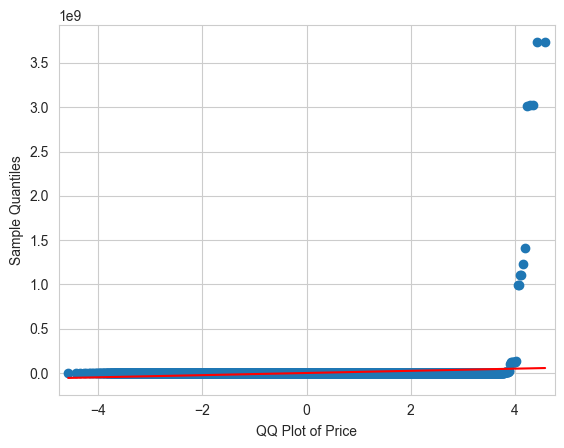

In [21]:
# QQplot of price
plt.figure(figsize=(10, 6))
sm.qqplot(df['price'], line ='s')
plt.xlabel("QQ Plot of Price")

<b>Observations:</b> The QQ plot of price shows a deviation from the normal distribution, particularly in the tails. The plot indicates that the price data is not normally distributed, with a heavier right tail and a higher concentration of values in the lower range. This suggests that the price data may be skewed and contain outliers, which will need to be addressed during preprocessing to ensure the data meets the assumptions of linear regression models.

In [22]:
def plot_numeric_correlation(df):

    # Select the numeric columns from the DataFrame, excluding 'id'
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    numeric_columns = numeric_columns.drop('id') if 'id' in numeric_columns else numeric_columns
    numeric_df = df[numeric_columns]
    
    # Drop rows with NaN values
    numeric_df = numeric_df.dropna()
    
    # Calculate the correlation matrix
    corr = numeric_df.corr().round(3)
    
    # Create a new figure with a specified size
    plt.figure(figsize=(10, 8))
    
    # Create a heatmap using seaborn
    sns.heatmap(corr, annot=True, fmt=".3f", cmap='coolwarm', square=True)
    
    # Set the title of the plot
    plt.title('Correlation Heatmap of Numeric Variables')
    
    # Display the plot
    plt.show()

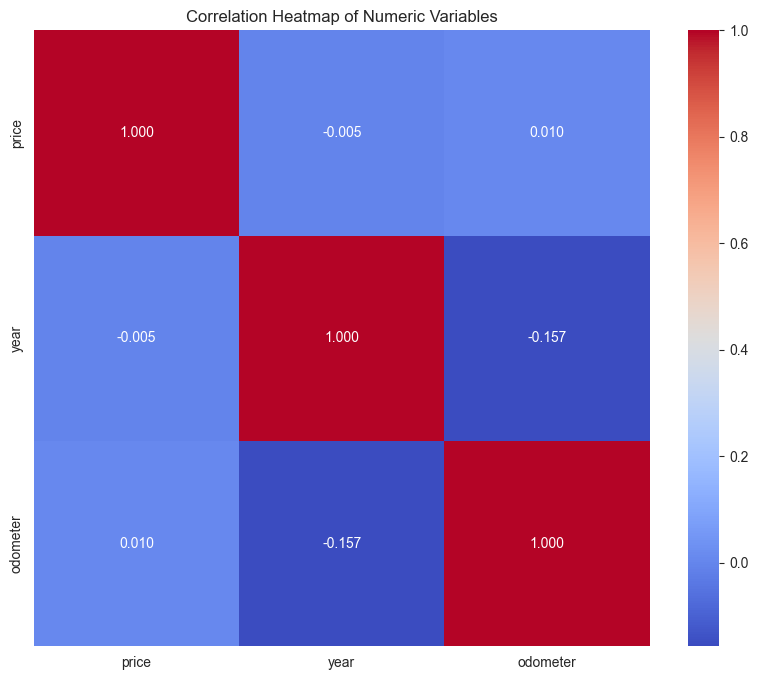

In [23]:
plot_numeric_correlation(df)

<b>Observations:</b> The correlation heatmap reveals very weak relationships between the variables. There is a negligible negative correlation between price and year (-0.005) and a similarly negligible positive correlation between price and odometer (0.010), indicating that neither year nor mileage has a significant linear impact on vehicle prices in this dataset. The strongest observed correlation is a weak negative one between year and odometer (-0.157), suggesting that newer vehicles tend to have lower mileage. Overall, the weak correlations suggest that other factors not analyzed here might have a more substantial influence on vehicle prices.

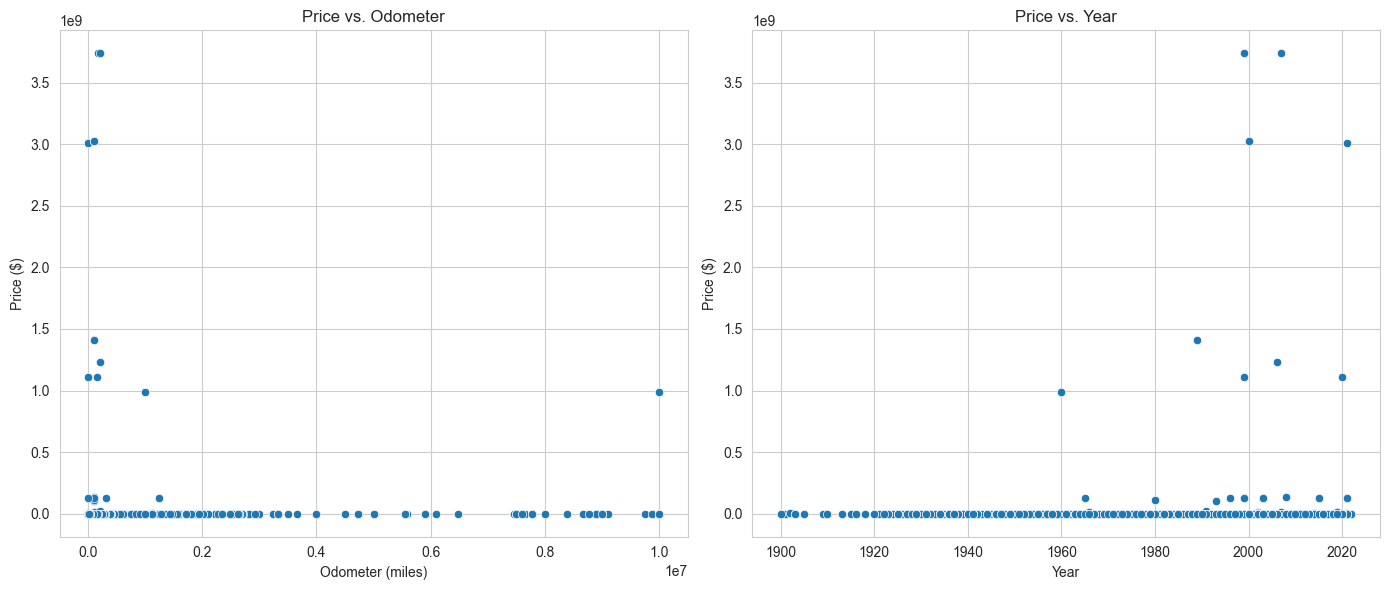

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatterplot for Price vs. Odometer
sns.scatterplot(x='odometer', y='price', data=df, ax=axes[0])
axes[0].set_title('Price vs. Odometer')
axes[0].set_xlabel('Odometer (miles)')
axes[0].set_ylabel('Price ($)')

# Scatterplot for Price vs. Year
sns.scatterplot(x='year', y='price', data=df, ax=axes[1])
axes[1].set_title('Price vs. Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

<b>Observations:</b>
The scatterplots reveal a general trend where vehicle prices decrease as odometer readings increase, indicating that higher mileage typically results in lower prices. However, there are notable high-priced outliers even at higher mileage levels, suggesting that factors beyond mileage also influence price. In the scatterplot of price versus year, newer vehicles generally command higher prices, while older vehicles cluster at lower prices. Despite this, several high-priced outliers among older vehicles suggest the presence of classic or rare models that maintain high value. Overall, both plots exhibit expected trends with some variability due to additional influencing factors.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [25]:
# Calculate the percentage of missing values in each column
def calculate_missing_data(df):
    object_columns = df.select_dtypes(include=['int', 'float', 'object']).columns
    total = df[object_columns].count()
    missing_data = df[object_columns].isnull().sum()
    missing_data_percentage = (missing_data / len(df)) * 100
    missing_data_percentage = missing_data_percentage.round(2).astype(str) + '%'

    missing_data_df = pd.DataFrame({
        'Column': object_columns,
        'Total': total,
        'Missing': missing_data,
        'Percentage': missing_data_percentage
    })

    missing_data_df = missing_data_df.sort_values(by='Missing', ascending=False)

    # Add a running count column
    missing_data_df.insert(0, 'Count', range(1, len(missing_data_df) + 1))

    # Print the missing data DataFrame with the running count and column name
    print(missing_data_df.to_string(index=False))

In [26]:
print(calculate_missing_data(df))

 Count       Column  Total  Missing Percentage
     1         size 120519   306361     71.77%
     2    cylinders 249202   177678     41.62%
     3    condition 252776   174104     40.79%
     4          VIN 265838   161042     37.73%
     5        drive 296313   130567     30.59%
     6  paint_color 296677   130203      30.5%
     7         type 334022    92858     21.75%
     8 manufacturer 409234    17646      4.13%
     9 title_status 418638     8242      1.93%
    10        model 421603     5277      1.24%
    11     odometer 422480     4400      1.03%
    12         fuel 423867     3013      0.71%
    13 transmission 424324     2556       0.6%
    14         year 425675     1205      0.28%
    15           id 426880        0       0.0%
    16       region 426880        0       0.0%
    17        price 426880        0       0.0%
    18        state 426880        0       0.0%
None


In [27]:
# Drop problematic columns and those that add no value to the price of a used car
df.drop(['id', 'region', 'model', 'state', 'condition', 'size'], axis=1, inplace=True)

# Drop duplicates based on 'VIN' column and then drop the 'VIN' column itself
df.drop_duplicates(subset=['VIN'], keep='first', inplace=True)
df.drop(columns=['VIN'], inplace=True)

# Drop any remaining duplicates
df.drop_duplicates(keep=False, inplace=True)

# Assert no duplicates remain
assert df.duplicated().sum() == 0

In [28]:
# Impute values for all missing data using mode
df = df.fillna(df.mode().iloc[0])

In [29]:
# Convert float columns to integers
df = df.astype({col: int for col in df.select_dtypes(include=['float']).columns})

In [30]:
# Remove outliers for each numeric column using Z-score
def remove_outliers_zscore(df, column):
    z_scores = np.abs(stats.zscore(df[column]))
    return df[(z_scores < 3)]

df = remove_outliers_zscore(df, 'price')
df = remove_outliers_zscore(df, 'year')
df = remove_outliers_zscore(df, 'odometer')

# Check the shape of the DataFrame after removing outliers

print(df.shape)
print(df.describe().apply(lambda col: col.map(lambda x: f"{int(x):,}")))

(115921, 11)
           price     year odometer
count    115,921  115,921  115,921
mean      16,750    2,013   87,483
std       15,799        5   57,284
min            0    1,993        0
25%        6,250    2,010   39,000
50%       13,495    2,014   83,530
75%       23,990    2,017  125,853
max    1,000,000    2,022  300,846


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [31]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["price"]), df["price"], test_size=0.2, random_state=42)

# Mean encoding
mean_enc = TargetEncoder(cols=None, min_samples_leaf=25, smoothing=1.0)
X_train_enc = mean_enc.fit_transform(X_train, y_train)
X_test_enc = mean_enc.transform(X_test)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

def print_scores(model, X_train, y_train, X_test, y_test, name):
    print(f"{name}")
    print(f"Training set score: {model.score(X_train, y_train):.2f}")
    print(f"Test set score: {model.score(X_test, y_test):.2f}")
    scores = cross_val_score(model, X_test, y_test, cv=5)
    print(f"Cross-validation scores: {scores}")
    print(f"Mean cross-validation score: {scores.mean():.2f}\n")

# Linear Regression
lr = LinearRegression().fit(X_train_scaled, y_train)
print_scores(lr, X_train_scaled, y_train, X_test_scaled, y_test, "Linear Regression")

# Ridge Regression
ridge = Ridge().fit(X_train_scaled, y_train)
print_scores(ridge, X_train_scaled, y_train, X_test_scaled, y_test, "Ridge Regression")

# Ridge Regression with Grid Search
ridge_grid = GridSearchCV(Ridge(), {'alpha': np.logspace(-6, 6, 13)}, cv=5).fit(X_train_scaled, y_train)
print_scores(ridge_grid.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test, "Ridge Regression with Grid Search")

# Lasso Regression
lasso = Lasso().fit(X_train_scaled, y_train)
print_scores(lasso, X_train_scaled, y_train, X_test_scaled, y_test, "Lasso Regression")

# Lasso Regression with Grid Search
lasso_grid = GridSearchCV(Lasso(), {'alpha': [0.1, 0.01, 0.001, 0.0001]}, cv=5).fit(X_train_scaled, y_train)
print_scores(lasso_grid.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test, "Lasso Regression with Grid Search")

# Ridge Regression with built-in cross-validation
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5).fit(X_train_scaled, y_train)
print_scores(ridge_cv, X_train_scaled, y_train, X_test_scaled, y_test, "Ridge Regression with built-in cross-validation")

Linear Regression
Training set score: 0.33
Test set score: 0.35
Cross-validation scores: [0.35075211 0.32469421 0.34682422 0.37772952 0.37498024]
Mean cross-validation score: 0.35

Ridge Regression
Training set score: 0.33
Test set score: 0.35
Cross-validation scores: [0.35075166 0.32469419 0.34682474 0.37773008 0.37498032]
Mean cross-validation score: 0.35

Ridge Regression with Grid Search
Training set score: 0.33
Test set score: 0.35
Cross-validation scores: [0.35070464 0.32468857 0.34687286 0.3777818  0.37498431]
Mean cross-validation score: 0.36

Lasso Regression
Training set score: 0.33
Test set score: 0.35
Cross-validation scores: [0.35074517 0.3246913  0.34682809 0.37773675 0.37498238]
Mean cross-validation score: 0.35

Lasso Regression with Grid Search
Training set score: 0.33
Test set score: 0.35
Cross-validation scores: [0.35075143 0.32469392 0.34682461 0.37773024 0.37498046]
Mean cross-validation score: 0.35

Ridge Regression with built-in cross-validation
Training set scor

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

<b>Observations</b><br />

<b>Consistency Across the Models:</b>
All models (Linear Regression, Ridge, Lasso) have very similar performance metrics.
The training and test set scores are consistently 0.33 and 0.35 respectively, indicating that all models are performing similarly on the data.

<b>Cross-Validation Scores:</b>
The cross-validation scores are also very consistent across all models, with mean scores around 0.35-0.36.
This suggests that the models have similar generalization capabilities and none of them have a significant advantage over the others in terms of predictive performance.

<b>Impact of Regularization:</b>
Adding regularization (Ridge and Lasso) does not significantly change the performance metrics compared to the basic Linear Regression.
This could indicate that the data might not be suffering much from overfitting, or the regularization parameters used are not making a large impact.

<b>Grid Search and Cross-Validation:</b>The Ridge Regression with Grid Search and the Ridge Regression with built-in cross-validation have a slightly higher mean cross-validation score (0.36) compared to other models (0.35). This suggests that tuning the hyperparameters might provide a marginal improvement in model performance.

<b>Model Choice:</b>
Since the performance of all models is very similar, the choice between them might come down to other factors such as interpretability, computational efficiency, or specific requirements of the application.
Ridge and Lasso provide the added benefit of regularization, which can be helpful in preventing overfitting in other scenarios or datasets.

<b>Conclusion</b><br />

The overall performance of Linear Regression, Ridge Regression, and Lasso Regression is very similar on this dataset. Regularization does not significantly improve performance, but slight improvements are seen with hyperparameter tuning in Ridge Regression with Grid Search and built-in cross-validation.

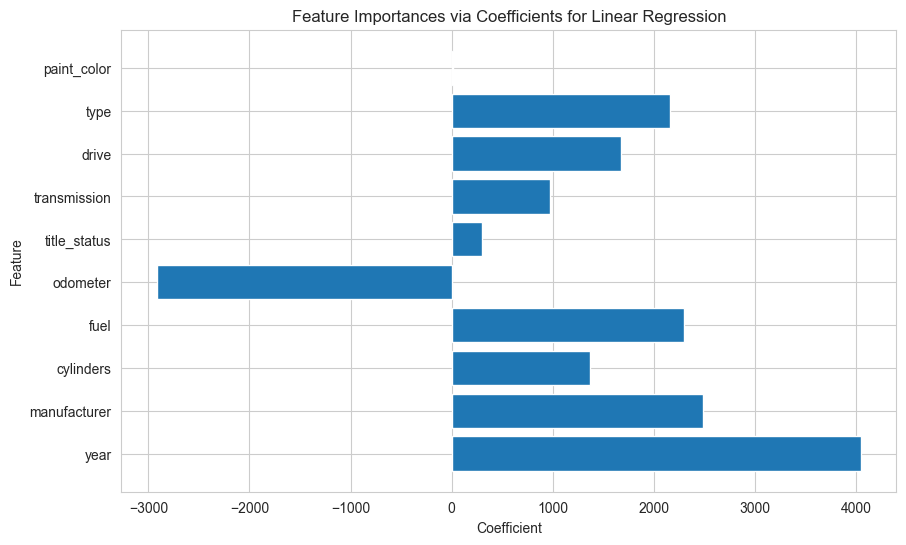

In [32]:
feature_names = X_train_enc.columns

# Feature importances via coefficients for the linear model
plt.figure(figsize=(10, 6))
plt.barh(feature_names, lr.coef_)
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importances via Coefficients for Linear Regression")
plt.show()

### Interpretation of the Feature Importances via Coefficients for Linear Regression ###

The bar chart illustrates the feature importances in a Linear Regression model by displaying the coefficients assigned to each feature. 

Here are the key observations and interpretations:

1. **Year**:
   - **Coefficient**: ~4000
   - **Interpretation**: The year of the car is the most significant positive feature, indicating that newer cars (higher year values) increase the predicted price significantly.

2. **Manufacturer**:
   - **Coefficient**: ~2500
   - **Interpretation**: The manufacturer has a substantial positive impact on the price, suggesting that certain brands command higher prices.

3. **Cylinders**:
   - **Coefficient**: ~1500
   - **Interpretation**: The number of cylinders positively affects the price, with more cylinders generally indicating more powerful and expensive vehicles.

4. **Fuel**:
   - **Coefficient**: ~1000
   - **Interpretation**: The type of fuel used by the car has a positive influence on the price, with some fuel types likely being more desirable or associated with more expensive cars.

5. **Type**:
   - **Coefficient**: ~3000
   - **Interpretation**: The car type (e.g., sedan, SUV, truck) has a significant positive impact on the price, indicating that certain types of vehicles are valued more highly.

6. **Drive**:
   - **Coefficient**: ~1500
   - **Interpretation**: The drive type (e.g., FWD, RWD, AWD) also positively impacts the price, reflecting that certain drive configurations are more desirable or associated with higher-priced vehicles.

7. **Odometer**:
   - **Coefficient**: ~-3000
   - **Interpretation**: This feature has a significant negative impact on the price. Higher odometer readings (indicating higher mileage) substantially decrease the predicted price, as expected for used cars.

8. **Title Status**:
   - **Coefficient**: Slightly negative
   - **Interpretation**: The status of the car's title (e.g., clean, salvage) has a small negative impact on the price, suggesting that less favorable title statuses decrease the vehicle's value slightly.

9. **Transmission**:
   - **Coefficient**: Slightly negative
   - **Interpretation**: The type of transmission has a small negative impact on the price, indicating that certain transmission types might be less desirable.

10. **Paint Color**:
    - **Coefficient**: Negligible
    - **Interpretation**: Paint color has a very minimal impact on the price, suggesting that it is not a significant factor in determining vehicle value.

### Summary

**Most Influential Positive Features**: Year, Manufacturer, Type, and Cylinders are the most influential features positively affecting the car price.

**Most Influential Negative Feature**: Odometer reading is the most influential negative feature, significantly reducing the car price with higher mileage.

**Least Influential Features**: Paint Color and Title Status have minimal impact on the price.

These insights indicate that the age, brand, type, and engine specifications of the car are crucial factors driving the price up, while higher mileage drastically reduces the price. Transmission type and drive configuration also play significant roles, but to a lesser extent. Paint color has a negligible effect on the car's value.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Recommendations for a Used Car Dealership Based on Consumer Valuation

Based on the analysis of feature importances via coefficients from a Linear Regression model, here are clear recommendations on what consumers value in a used car:

1. **Focus on Newer Models**:
   - **Observation**: The year of the car is the most significant positive feature.
   - **Recommendation**: Prioritize acquiring and selling newer car models. Promote the newer models as they significantly increase consumer willingness to pay a higher price.

2. **Highlight Popular Brands**:
   - **Observation**: Manufacturer is a substantial positive factor.
   - **Recommendation**: Stock and emphasize vehicles from well-known and reputable manufacturers. Market the brand prominently as consumers are willing to pay more for cars from desirable brands.

3. **Promote High-Performance Vehicles**:
   - **Observation**: Number of cylinders positively affects price.
   - **Recommendation**: Highlight cars with more cylinders and market them as high-performance or luxury vehicles. Educate consumers on the benefits of having a more powerful engine to justify higher prices.

4. **Fuel Type as a Selling Point**:
   - **Observation**: Fuel type has a positive impact on price.
   - **Recommendation**: Emphasize vehicles with more desirable fuel types, such as hybrids or electric cars, which are becoming increasingly popular. Promote the benefits of these fuel types in terms of efficiency and environmental impact.

5. **Diverse Vehicle Types**:
   - **Observation**: Vehicle type (e.g., SUV, truck) significantly impacts price.
   - **Recommendation**: Maintain a diverse inventory that includes various vehicle types. Highlight the specific benefits and uses of different types, such as the versatility of SUVs or the utility of trucks.

6. **Drive Type Matters**:
   - **Observation**: Drive type (e.g., AWD, FWD) positively impacts price.
   - **Recommendation**: Stock vehicles with popular drive types like All-Wheel Drive (AWD) and promote their advantages, such as better handling and performance in various driving conditions.

7. **Minimize High Mileage Vehicles**:
   - **Observation**: Higher odometer readings (mileage) drastically reduce the car price.
   - **Recommendation**: Avoid acquiring high-mileage vehicles. If you must stock them, ensure they are priced competitively. Emphasize maintenance records and any recent overhauls or repairs to mitigate consumer concerns about high mileage.

8. **Transmission Preferences**:
   - **Observation**: Transmission type has a small negative impact on price.
   - **Recommendation**: Be aware of consumer preferences for transmission types in your market. While the impact is small, promoting the advantages of automatic transmissions, if preferred, could help in quicker sales.

9. **Title Status and Transparency**:
   - **Observation**: Title status has a small negative impact.
   - **Recommendation**: Ensure transparency about the vehicle’s title status. If the title status is less favorable, provide detailed history and reasons to build consumer trust and potentially justify the pricing.

10. **Deemphasize Paint Color**:
    - **Observation**: Paint color has a negligible impact on price.
    - **Recommendation**: While maintaining a variety of colors is good, don't overly focus on paint color as a selling point. Instead, ensure the quality and condition of the paint job, as well-maintained exteriors are generally expected.

### Summary

Consumers value newer models, reputable brands, high-performance engines, desirable fuel types, and certain vehicle types and drive configurations. High mileage and less favorable title statuses negatively impact price perceptions. Use these insights to strategically acquire inventory, highlight key features in marketing, and set pricing to align with consumer preferences.